# HOMEWORK 4

Firstly, I import the required libraries. For this homework we need igraph library.

In [387]:
import spacy
import pandas as pd
import numpy as np
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt

from collections import Counter
from urllib.request import urlopen
from nltk.tokenize import sent_tokenize, word_tokenize

## QUESTION 1 Chess Transfers

In [52]:
chess = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/chess-transfers/transfers.csv')
chess

,url,ID,Federation,Form.Fed,Transfer Date
0,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
1,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
2,https://ratings.fide.com/fedchange.phtml?year=...,14401762,BIH,YUG,1/31/00
3,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
4,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
...,...,...,...,...,...
927,https://ratings.fide.com/fedchange.phtml?year=...,1628313,GER,AUT,1/9/17
928,https://ratings.fide.com/fedchange.phtml?year=...,5200393,SGP,PHI,1/11/17
929,https://ratings.fide.com/fedchange.phtml?year=...,2002515,POL,USA,1/9/17
930,https://ratings.fide.com/fedchange.phtml?year=...,407747,SCO,ENG,1/12/17


+ For this question, firstly, I introduced dataframe to the jypter notebook environment. 
+ Then, using **groupby** function, I grouped federation that chess players moved from. 
+ Then, using **size** function, I counted how many federations are there.
+ And, I indexed the dataframe using **reset_index**

In [446]:
data = chess.groupby(['Form.Fed']).size().reset_index(name='counts')
data

,Form.Fed,counts
0,AHO,1
1,ALB,3
2,AND,4
3,ARG,11
4,ARM,15
...,...,...
95,UZB,8
96,VEN,1
97,VIE,3
98,YUG,12


+ I ordered the dataframe high to low using the cell below.
+ I used **.sort_values** function and its specifier.
+ **by="counts"** makes the sorting by the "counts" column.
+ **ascending = False** means the sorting will be high to low.

In [116]:
data2 = data.sort_values(by= "counts", ascending=False)
df = data2.reset_index(drop=True)
df

,Form.Fed,counts
0,RUS,75
1,UKR,60
2,FRA,43
3,GER,42
4,ENG,36
...,...,...
95,ISV,1
96,CRC,1
97,ISL,1
98,BRA,1


+ Here, I started to create bar chart.
+ I used top 10 values of above dataframe.
+ **labels** is for x axis, i.e. names of values.
+ **values** is for y axis, i.e. values of names.

<BarContainer object of 10 artists>

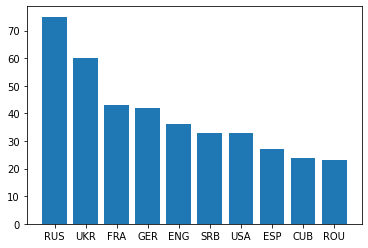

In [129]:
labels = list(df.iloc[0:10,0])
values = list(df.iloc[0:10,1])
plt.bar(labels,values)

+ I group chess dataframe and calculated each group sizes.
+ I convert it to a dictionary.
+ And I found out which moving are more than equal to 5.
+ I take the moving groups and make them graph's edges.
+ Then, I draw the graph.

In [385]:
data = (chess.groupby(['Form.Fed','Federation']).size())
f = data.to_dict()

In [398]:
d = dict((k, v) for k, v in f.items() if v >= 5)

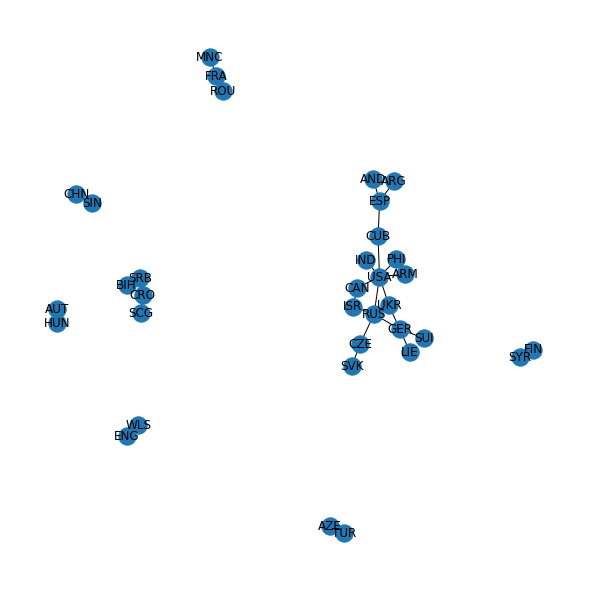

In [443]:
a = list(d.keys())
graph = nx.from_edgelist(a)
plt.figure(figsize=(8,8))
nx.draw(graph,with_labels=True)

## QUESTION 2 NBA Players

In [ ]:
NBA = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
NBA

## QUESTION 3 Charles Dickens' Great Expectations

For this question, firstly, I created the text named 'greatExpectations' and initialized the names.
Then, using **nltk.tokenize**'s **sent_tokenize**, I seperated the text into sentences.
There was '/n/r' characters, so I remove them.

In [2]:
with urlopen('https://www.gutenberg.org/files/1400/1400-0.txt') as f:
    raw = f.read()

greatExpectations = raw[1900:1039269].decode('utf8')

In [388]:
names = [
 'Joe',
 'Pip',
 'Wopsle',
 'Hubble',
 'Pumblechook',
 'Richard',
 'Wopsle',
 'Biddy',
 'Havisham',
 'Joseph',
 'Sarah',
 'Estella',
 'Orlick',
 'Mike',
 'Wemmick',
 'Herbert',
 'Pocket',
 'Jane',
 'Flopson',
 'Coiler',
 'Drummle',
 'Jack',
 'Spider',
 'Handel',
 'Herbert',
 'Clara',
 'Skiffins',
 'Magwitch',
 'Provis',
 'Compeyson',
 'Tom',
 'Bill',
 'Barley',
 'Orlick',
 'William']

In [444]:
stocks1 = sent_tokenize(greatExpectations)
stocks = [x.replace("\r\n","") for x in stocks]
stocks

['My father’s family name being Pirrip, and my Christian name Philip, myinfant tongue could make of both names nothing longer or more explicitthan Pip.',
 'So, I called myself Pip, and came to be called Pip.',
 'I give Pirrip as my father’s family name, on the authority of histombstone and my sister,—Mrs.',
 'Joe Gargery, who married the blacksmith.',
 'As I never saw my father or my mother, and never saw any likeness ofeither of them (for their days were long before the days ofphotographs), my first fancies regarding what they were like wereunreasonably derived from their tombstones.',
 'The shape of the letters onmy father’s, gave me an odd idea that he was a square, stout, dark man,with curly black hair.',
 'From the character and turn of the inscription,“_Also Georgiana Wife of the Above_,” I drew a childish conclusion thatmy mother was freckled and sickly.',
 'To five little stone lozenges, eachabout a foot and a half long, which were arranged in a neat row besidetheir grave, and 